# Comparing speed of vectorized vs non-vectorized to binomial operator

This is the code is used to show how the cost of the binomial operator changes with grid size. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from netCDF4 import Dataset
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import math
import seaborn as sns
sns.set()

import sys 




In [54]:
nx = np.unique(np.logspace(0,2.5,20).astype(int))
print(nx)

ntim = 1000/nx
ntim = ntim.astype(int)
ntim.size

[  1   2   3   4   6   8  11  15  20  28  37  51  69  94 127 172 233 316]


18

In [55]:
import time

N_tot_ref = 12000000
pref      = 1e-08
ntim      = 100

nx = np.unique(np.logspace(0,2.5,20).astype(int))
ny = nx
ntim = 10000/nx
ntim = ntim.astype(int)+2

#nx = np.unique(np.logspace(0,3,20).astype(int))
#nx = np.array([1,2,3,4,5,10,20,30,40,50,100,200,300,400,500])
#ny = nx
#ntim = np.array([1000,1000,1000,1000,100,100,100,10,10,10,10,1,1,1,1])*10

dt_vec    = np.empty(len(nx))
dt_nonvec = np.empty(len(nx))
ratio     = np.empty(len(nx))

lvec    = True
#lvec    = False

lnonvec = True
#lnonvec = False

for k in range(len(nx)):

    print( (k,nx[k],ny[k]) )
    

    p = np.empty( (nx[k],ny[k]) )    #array containing object birth probability

    p[:,:] = pref



    #------- vectorized -----

    if lvec:
        
        t0 = time.time()

        for t in range(ntim[k]):
            B = np.random.binomial(N_tot_ref, p[:,:].ravel(), nx[k]*ny[k] )

        t1 = time.time()

        dt_vec[k] = (t1-t0) / float(ntim[k]*nx[k]*ny[k])



    #------- non-vectorized -----

    if lnonvec:
        
        t2 = time.time()

        #if nx[k]<=11:
        #    nt = 2*ntim
        #else:
        #    nt = ntim
        #nt = ntim[k]
        for t in range(ntim[k]):

            for i in range(nx[k]):
                for j in range(ny[k]):

                    B_ij = np.random.binomial(N_tot_ref, p[i,j], 1)

                    #print( (i,j,B_ij) )

        t3 = time.time()

        dt_nonvec[k] = (t3-t2) / float(ntim[k]*nx[k]*ny[k])
    
    

    if lvec and lnonvec:
        
        ratio[k] = dt_vec[k]/dt_nonvec[k]


    print( "time/gridpoint for a %sx%s grid, averaged over %s timesteps:" % (nx[k],ny[k],ntim[k]) )
    print( "  vec   :%s" % (dt_vec[k]   ))
    print( "  nonvec:%s" % (dt_nonvec[k]))
    print( "  ratio :%s" % (ratio[k]    ))

    
  


(0, 1, 1)
time/gridpoint for a 1x1 grid, averaged over 10002 timesteps:
  vec   :2.4843277918818092e-05
  nonvec:5.429493286828474e-06
  ratio :4.575616288003512
(1, 2, 2)
time/gridpoint for a 2x2 grid, averaged over 5002 timesteps:
  vec   :5.2414908975374695e-06
  nonvec:2.9744052353118812e-06
  ratio :1.7621979800569687
(2, 3, 3)
time/gridpoint for a 3x3 grid, averaged over 3335 timesteps:
  vec   :2.279230778999335e-06
  nonvec:3.400119805006351e-06
  ratio :0.6703383732665495
(3, 4, 4)
time/gridpoint for a 4x4 grid, averaged over 2502 timesteps:
  vec   :1.3318255269746604e-06
  nonvec:2.7848197687729944e-06
  ratio :0.47824478334605813
(4, 6, 6)
time/gridpoint for a 6x6 grid, averaged over 1668 timesteps:
  vec   :5.704528199746518e-07
  nonvec:3.0735699678782365e-06
  ratio :0.18559942540317373
(5, 8, 8)
time/gridpoint for a 8x8 grid, averaged over 1252 timesteps:
  vec   :3.4913884850736624e-07
  nonvec:2.915319352865981e-06
  ratio :0.1197600695663534
(6, 11, 11)
time/gridpoin

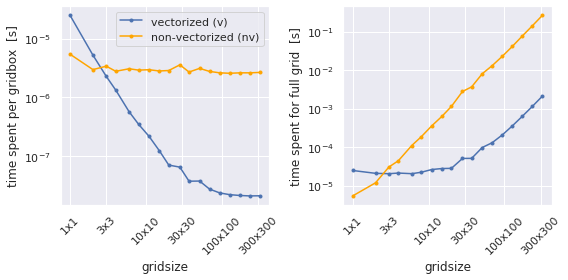

In [56]:
  
    
#fig,ax = plt.subplots(1,3,figsize=(15,5))
fig,ax = plt.subplots(1,2,figsize=(8,4),sharex=True)


#-- plot 1 --
i=0
ax[i].plot( nx**2, dt_vec   ,                      label='vectorized (v)'   ,marker='.'    )
ax[i].plot( nx**2, dt_nonvec,      color='orange', label='non-vectorized (nv)'   ,marker='.')

ax[i].legend()

#ax[i].set_title("Cost of binomial operator (averaged over %s timesteps)" % ntim )

ax[i].set_xlabel("%s" % ("gridsize"))
ax[i].set_ylabel("%s  [%s]" % ("time spent per gridbox","s"))

ax[i].set_xscale('log')
ax[i].set_yscale('log')


#-- plot 2 --
i=1
#ax[i].plot( nx**2, dt_vec   *nx*ny, label='vectorized (v)' )
#ax[i].plot( nx**2, dt_nonvec*nx*ny, color='orange', label='non-vectorized (nv)'  )
ax[i].plot( nx**2, dt_vec   *nx*ny, label='vectorized (v)',marker='.' )
ax[i].plot( nx**2, dt_nonvec*nx*ny, color='orange', label='non-vectorized (nv)',marker='.'  )

ax[i].set_xscale('log')
ax[i].set_yscale('log')

ax[i].set_xlabel("%s" % ("gridsize"))
ax[i].set_ylabel("%s  [%s]" % ("time spent for full grid", "s"))

#ax[i].set_xticks([1,100,10000])
#ax[i].set_xticklabels(['1x1','10x10','100x100','1000x1000'])
ax[i].set_xticks([1,9,100,900,10000,90000])
ax[i].set_xticklabels(['1x1','3x3','10x10','30x30','100x100','300x300'],rotation=45)

ax[0].set_xticks([1,9,100,900,10000,90000])
ax[0].set_xticklabels(['1x1','3x3','10x10','30x30','100x100','300x300'],rotation=45)
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


fig.tight_layout()

plt.show()




In [58]:

fig.savefig('fig/binomial_cost_philipp.pdf',bbox_inches = 'tight')
fig.savefig('fig/binomial_cost_philipp.png',bbox_inches = 'tight')

plt.close(fig)


In [8]:
import datetime

fnameout = "cost/binomial_cost.nc"

out = Dataset(fnameout, 'w', format='NETCDF4')
print("writing to file: " + fnameout)


out.creator     = "Roel Neggers, IGMK, University of Cologne"
out.created     = datetime.datetime.today().strftime('%d %b %Y')


nxdim    = out.createDimension('nxdim'   , len(nx))

out_nxdim = out.createVariable('nxdim', np.int32, ('nxdim'))
out_nxdim.long_name = 'gridsize in x direction'

out_dtvec       = out.createVariable('dt_vec', np.float32, ('nxdim'))
out_dtvec.units = 's'
out_dtvec.long_name = 'time spent per gridbox - vectorized'

out_dtnonvec       = out.createVariable('dt_nonvec', np.float32, ('nxdim'))
out_dtnonvec.units = 's'
out_dtnonvec.long_name = 'time spent per gridbox - vectorized'

out_nxdim[:] = nx

out_dtvec   [:] = dt_vec   [:]
out_dtnonvec[:] = dt_nonvec[:]


out.close()


writing to file: cost/binomial_cost.nc
